# Part 3: An analysis of political alignment

In this section we will use electoral data to measure political alignment & see whatever conclusions we can receive from here. Ready? Time to do a Data science

Ill start by 'Creatively Sharing' Nat's old code

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap

sns.set_theme(style="white")
sns.set(font_scale=1.2)
sns.set_palette("copper_r")
plt.rcParams["axes.labelsize"] = 12

# Absolutely diabolical method of doing relative imports with a package who shares its name with
# something in the stdlib in Jupyter Lab because it seems impossible otherwise
# __import__("sys").path.append("./code")
# from project_functions1 import *

CITIES = [
    { "name": "Atlanta", "pos": (-84.791944, -84.001944, 33.478333, 34.0375) },
    { "name": "Austin", "pos": (-98.071667, -97.371111, 30.033889, 30.569722) },
    { "name": "Boston", "pos": (-71.284444, -70.880278, 42.206389, 42.484444) },
    { "name": "Chicago", "pos": (-88.044167, -87.508333, 41.624444, 42.026389) },
    { "name": "Denver", "pos": (-105.104444, -104.625556, 39.578611, 39.920278) },
    { "name": "Houston", "pos": (-95.858333, -95.013056, 29.472778, 30.134167) },
    { "name": "Los Angeles", "pos": (-118.615556, -117.618333, 33.701111, 34.411667) },
    { "name": "Miami", "pos": (-80.2375, -80.145833, 25.734722, 25.812222) },
    { "name": "New York", "pos": (-74.459722, -73.393333, 40.355556, 41.102222) },
    { "name": "New Orleans", "pos": (-90.220833, -89.915833, 29.813056, 30.045556) },
    { "name": "Philadelphia", "pos": (-75.344167, -74.94, 39.846667, 40.146389) },
    { "name": "Portland", "pos": (-122.795278, -122.493333, 45.465556, 45.654444) },
    { "name": "San Francisco", "pos": (-122.521667, -122.352778, 37.690278, 37.812222) },
    { "name": "Seattle", "pos": (-122.473056, -122.151667, 47.493333, 47.718611) },
    { "name": "Washington DC", "pos": (-77.1125, -76.919722, 38.833333, 38.963889) },
]

# gb, pol, counties, cords = load_and_process()

In [7]:
gb = pd.read_csv("data/pre processed/gaybourhoods-nat.csv")

SS_INDEX_MAX = gb.SS_Index.max()

gb

,Unnamed: 0,SS_Index,TOTINDEX,lat,long,kinsey,percent_democrat,neighbourhood_kinsey
0,0,55.012669,67.077054,34.093828,-118.381697,6,0.456450,1.132075
1,1,58.412517,61.866815,37.758057,-122.435410,6,0.742633,2.533333
2,2,30.731192,37.908747,40.742039,-74.000620,6,0.775215,1.091667
3,3,21.995808,37.530067,40.734012,-74.006746,6,0.794248,1.101695
4,4,21.284224,35.843573,37.773134,-122.411167,5,0.742633,2.533333
...,...,...,...,...,...,...,...,...
2323,2323,0.000000,0.000000,45.528666,-122.678981,0,0.753689,1.708333
2324,2324,0.000000,0.000000,47.606211,-122.333792,0,0.545340,2.148148
2325,2325,0.000000,0.000000,47.449678,-122.307657,0,0.543670,1.357143
2326,2326,0.000000,0.000000,47.604569,-122.335359,0,0.545340,2.148148


In [8]:
pol = pd.read_csv("data/pre processed/election-2012.csv")
pol

,Unnamed: 0,county,lat,long,percent
0,0,Autauga AL,32.532237,-86.646439,0.265878
1,1,Baldwin AL,30.659218,-87.746067,0.215894
2,2,Barbour AL,31.870253,-85.405103,0.513685
3,3,Bibb AL,33.015893,-87.127148,0.261520
4,4,Blount AL,33.977357,-86.566440,0.123719
...,...,...,...,...,...
2879,2879,Sweetwater WY,41.660328,-108.875677,0.282569
2880,2880,Teton WY,44.048662,-110.426087,0.541957
2881,2881,Uinta WY,41.284726,-110.558947,0.190655
2882,2882,Washakie WY,43.878830,-107.669052,0.201318


Now lets re create Nat's plots - first set is simple so lightning round

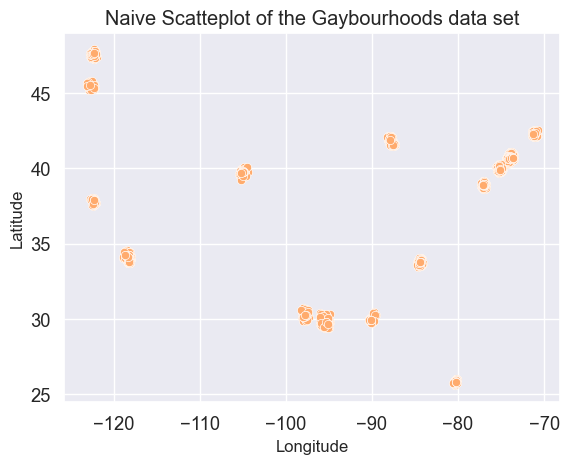

In [9]:
plot_naive_scatter1 = sns.scatterplot(data=gb, x="long", y="lat")
_ = plot_naive_scatter1.set(
    xlabel="Longitude",
    ylabel="Latitude",
    title="Naive Scatteplot of the Gaybourhoods data set"
)

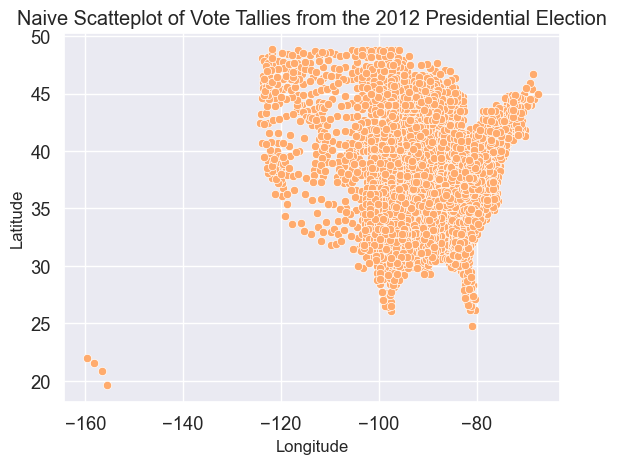

In [10]:
plot_naive_scatter2 = sns.scatterplot(data=pol, x="long", y="lat")
_ = plot_naive_scatter2.set(
    xlabel="Longitude",
    ylabel="Latitude",
    title="Naive Scatteplot of Vote Tallies from the 2012 Presidential Election"
)

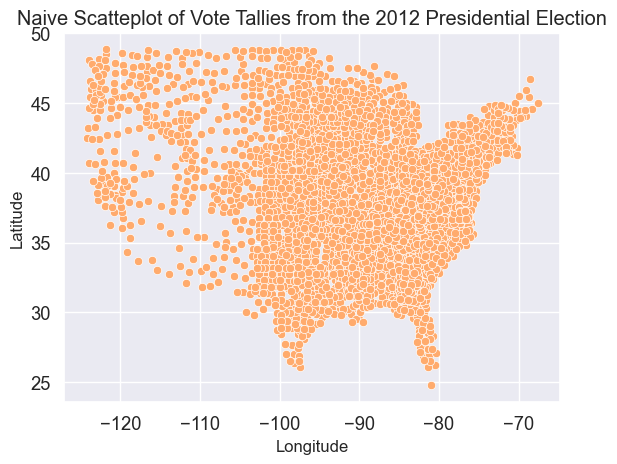

In [11]:
pol = pol[pol["long"] > -140]

plot_naive_scatter3 = sns.scatterplot(data=pol, x="long", y="lat")
_ = plot_naive_scatter3.set(
    xlabel="Longitude",
    ylabel="Latitude",
    title="Naive Scatteplot of Vote Tallies from the 2012 Presidential Election"
)

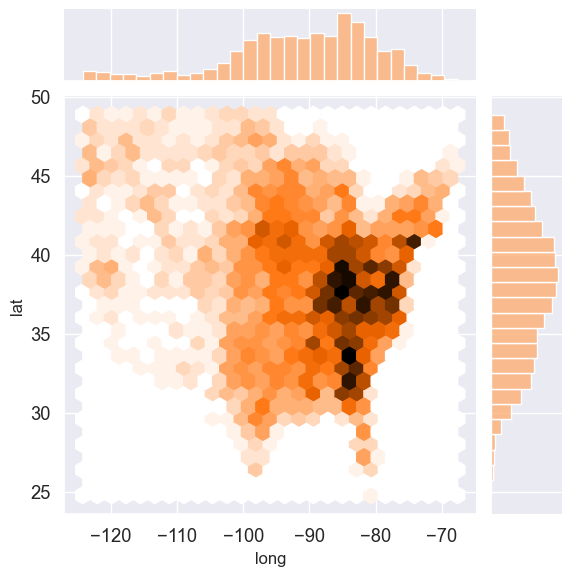

In [12]:
plot_naive_hexbin = sns.jointplot(data=pol, x="long", y="lat", kind="hex")